# Sentiment Analysis

![](SA1.jpg)

Retrieved from https://blog.reputationx.com/reputation-sentiment

# What is Sentiment Analysis? 

- Opinion mining of text by determining its tone (positive, negative, neutral) using Natural Language Processing 

- VADER: Valence Aware Dictionary for Sentiment Reasoning
    
- Rule-based, considers the intensity of emotion and polarity when analysing data

- Returns sentiment score on scale from -1 to 1 (or confidence score, depends on algorithm).


## What issues can Sentiment Analysis help solve?
- Monitoring reputation of businesses, their products and services 
- Sentiment of tweets analysed to examine effectiveness of customer service (Guercini et al., 2014)

- Sentiment Analysis for Emergency situations: Looking for improvements in crisis management, situational awareness for natural disasters (Beigi et al., 2016)

- Using georeferenced data from local crowds to provide      emergency aid, analyse extent of disasters.

<img src="twitter.png" alt="Drawing" style="width: 200px;"/>

# Where was Sentiment Analysis derived from?

 - Mantyla et al. (2018) stated the first instances of sentiment analysis appeared post-WWII where studies were carried out to measure the public opinion in a highly political climate. Modern sentiment analysis came about in the mid-2000s where product reviews became increasingly available on the internet. It was after this point that sentiment analysis grew in a technical and popular way to understand public discourse around world and local events and product reviews. 



## What was used before Sentiment Analysis?

 - Surveys were the most common form of getting an understanding on how people felt about a particular topic (and/or product) as we as interviews. Prior to big data analysis, questionnaires were relatively short to make analysing the data easier. Because of this, people were provided with a short description of a topic or a prompt and asked how they “felt” about the topic.
 <img src="survey.jpg" alt="Drawing" style="width: 200px;"/>

# Where has Sentiment Analysis been used in Science?

 - Sentiment analysis has been proven to be effective in a variety of real-world applications.


 - VADER’s effectiveness was compared to other similar machine learning algorithms, including LIWC (Hutto and Gilbert, 2014)
 - All models were evaluated in various online domains such as new articles, social media platforms and review sites.
 - Results conclude that VADER performed better than all other models while also performing on par and sometimes even outperformed human raters. 
<img src="disaster.png" alt="Drawing" style="width: 200px;"/>



 - Are Twitter posts an indicator of political sentiment and could it predict elections 
outcomes? (A. Tumasjan et al., 2010)
 - LIWC (Linguistic Inquiry Word Count) analysed over 100,000 Tweets 
referencing the 2009 German federal election.
Found that the number of tweets was a valid representation of voter 
preferences while the sentiment of tweets closely mirrors the campaign 
messages.
![](business.png)

In [1]:
'''
HOW TO INSTALL 
-pip install nltk
-nltk.download('vader_Lexicon')
'''

"\nHOW TO INSTALL \n-pip install nltk\n-nltk.download('vader_Lexicon')\n"

http://www.nltk.org/install.html

In [2]:
# import Natural Language Tool Kit (nltk) with vader sentiment analyzer
import nltk
#nltk.download('vader_lexicon')                             # download english language words
from nltk.sentiment.vader import SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()                          # initialize sentiment intensity analyzer

In [3]:
# test on a single sentence
data = 'GIS is a very enjoyable degree'

SIA.polarity_scores(data) # calculate polarity scores

{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4927}

In [4]:
'''
here we have four outputs:
'neg' - negative sentiment score
'neu' - neutral sentiment score
'pos' - positive sentiment score
'compound' - normalisation of the above scores
'''

"\nhere we have four outputs:\n'neg' - negative sentiment score\n'neu' - neutral sentiment score\n'pos' - positive sentiment score\n'compound' - normalisation of the above scores\n"

In [5]:
# test on a few sentences
data = ['I dislike apples', 
        'I lost all my work when the geocomp computer crashed', 
        'why is my student loan so high?',
        "I sure am glad we didn't have to do lab 3!",
        'COVID really is a bummer',
        'I am likely to be unemployed when I graduate',
        'I love the feeling of a good spatial analysis',
        'oh no human geography is the worst']
sentiment_output = {} # an empty dict for the sentiment analysis outputs

for statement in data:                                            # for every string in the list of statements
    sentiment_output[statement] = SIA.polarity_scores(statement)  # add key of statement to dict, with VADER as value
    print(sentiment_output[statement])                            # print output

sentiment_output[data[0]]['neg'] # example of how to get negative output of a statement

{'neg': 0.722, 'neu': 0.278, 'pos': 0.0, 'compound': -0.3818}
{'neg': 0.223, 'neu': 0.777, 'pos': 0.0, 'compound': -0.3182}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.589, 'pos': 0.411, 'compound': 0.68}
{'neg': 0.49, 'neu': 0.51, 'pos': 0.0, 'compound': -0.4364}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.317, 'pos': 0.683, 'compound': 0.8225}
{'neg': 0.558, 'neu': 0.442, 'pos': 0.0, 'compound': -0.743}


0.722

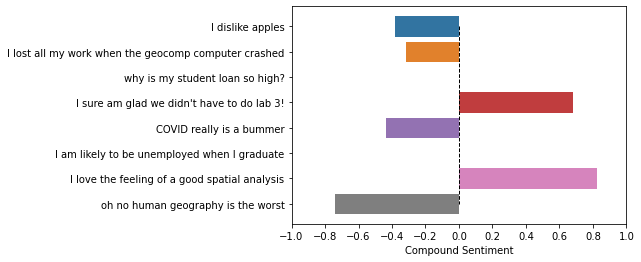

In [6]:
# plot output
import seaborn as sns # plotting package (fancy matplotlib)

# lists to put series of data
x = []
y = []

# iterate through sentiment output dictionary, add keys and values to x and y series
for key, value in sentiment_output.items():
    y.append(key)
    x.append(value['compound'])

plot = sns.barplot(x=x, y=y, orient='h')                                               # create bar plot, plot data
plot.set_xlabel('Compound Sentiment')                                                  # set x axis label
plot.set(xlim=(-1, 1), xticks=[-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])  # set limits on x axis
plot.plot([0, 0], [0, 7], color='black', linewidth=1, linestyle='dashed')              # plot origin line

In [7]:
# running sentiment analysis on csv data (RNZ headlines)
import pandas as pd                                        # to read csv files and save dataframes
 
headlines_df = pd.read_csv('rnzheadlines_110521-1330.csv') # read csv file

headlines_df.head()                                        # display first few rows

,index,headline
0,0,Corrections staff member was injured in Dunedi...
1,1,Covid-19 update: No new cases in New Zealand t...
2,2,Hipkins on public sector pay: 'It's the opposi...
3,3,Use of police dog to bit fleeing teen driver n...
4,4,"No MIQ spaces for dairy workers, farms suffer ..."


In [8]:
# add new columns for score and meaning of score 
headlines_df['sentiment_score'] = float(0)
headlines_df['sentiment_meaning'] = ""

# iterate through saved dataframe, analyze sentiment, save sentiment and meaning into new columns of dataframe
for index, row in headlines_df.iterrows():
    headlines_df.at[index, 'sentiment_score'] = SIA.polarity_scores(row['headline'])['compound']
    if (headlines_df.at[index, 'sentiment_score'] > 0):
        headlines_df.at[index, 'sentiment_meaning'] = "positive"
    elif (headlines_df.at[index, 'sentiment_score'] < 0):
        headlines_df.at[index, 'sentiment_meaning'] = "negative"
    else:
        headlines_df.at[index, 'sentiment_meaning'] = "neutral"
    
headlines_df # display output

,index,headline,sentiment_score,sentiment_meaning
0,0,Corrections staff member was injured in Dunedi...,-0.4019,negative
1,1,Covid-19 update: No new cases in New Zealand t...,-0.2960,negative
2,2,Hipkins on public sector pay: 'It's the opposi...,-0.1027,negative
3,3,Use of police dog to bit fleeing teen driver n...,-0.3089,negative
4,4,"No MIQ spaces for dairy workers, farms suffer ...",-0.6908,negative
5,5,Alleged racial slurs lead to Wellington club r...,0.0000,neutral
6,6,"Snow, heavy rain and strong wind to hit the co...",0.5106,positive
7,7,ACC acknowledges commitment to Maori health ou...,0.3818,positive
8,8,"NBC drops 2022 Golden Globes, Tom Cruise retur...",0.0000,neutral
9,9,'He was screaming he was going to kill me',-0.8074,negative


In [9]:
import pandas as pd                                        # to read csv files and save dataframes
 
headlines_df = pd.read_csv('reddit_worldnews_start_to_2016-11-22.csv') # read csv file

headlines_df.head()                                        # display first few rows

,time_created,date_created,up_votes,down_votes,title,over_18,author,subreddit
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


In [10]:
# add new columns for score and meaning of score 
headlines_df['sentiment_score'] = float(0)
headlines_df['sentiment_meaning'] = ""

# iterate through saved dataframe, analyze sentiment, save sentiment and meaning into new columns of dataframe
for index, row in headlines_df.iterrows():
    headlines_df.at[index, 'sentiment_score'] = SIA.polarity_scores(row['title'])['compound']
    if (headlines_df.at[index, 'sentiment_score'] > 0):
        headlines_df.at[index, 'sentiment_meaning'] = "positive"
    elif (headlines_df.at[index, 'sentiment_score'] < 0):
        headlines_df.at[index, 'sentiment_meaning'] = "negative"
    else:
        headlines_df.at[index, 'sentiment_meaning'] = "neutral"
        
    headlines_df.at[index, 'score'] = headlines_df.at[index, 'up_votes'] - headlines_df.at[index, 'down_votes']  #create a new column to see the difference of up votes and down votes
    


In [11]:
headlines_df # display output

,time_created,date_created,up_votes,down_votes,title,over_18,author,subreddit,sentiment_score,sentiment_meaning,score
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews,-0.6705,negative,3.0
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews,0.0000,neutral,2.0
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews,0.0000,neutral,3.0
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews,0.4939,positive,1.0
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews,-0.5267,negative,4.0
...,...,...,...,...,...,...,...,...,...,...,...
509231,1479816764,2016-11-22,5,0,Heil Trump : Donald Trump s alt-right white...,False,nonamenoglory,worldnews,0.4404,positive,5.0
509232,1479816772,2016-11-22,1,0,There are people speculating that this could b...,False,SummerRay,worldnews,0.0000,neutral,1.0
509233,1479817056,2016-11-22,1,0,Professor receives Arab Researchers Award,False,AUSharjah,worldnews,0.5423,positive,1.0
509234,1479817157,2016-11-22,1,0,Nigel Farage attacks response to Trump ambassa...,False,smilyflower,worldnews,-0.4404,negative,1.0


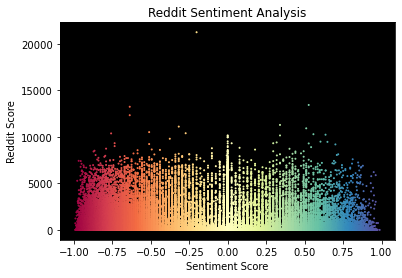

In [12]:
import matplotlib.pyplot as plt
from matplotlib import cm

plot = plt.axes()
plot.set_facecolor('black')                                            # background colour of the figure             
plt.scatter(x = headlines_df['sentiment_score'], y = headlines_df['score'], c = headlines_df['sentiment_score'], s = 1, cmap='Spectral')    # the sentiment score as scatter plot
plt.title("Reddit Sentiment Analysis")                                # title
plt.xlabel('Sentiment Score')                                         # x-axis label
plt.ylabel('Reddit Score')                                            # y-axis label
plt.savefig('fig1.png', dpi = 600)                                    # this function is used to export the figure as .png file with a higher resolution so that we could use it at slides

plt.show()

In [13]:
max(headlines_df['up_votes'])                                          # check the validation of the data

21253

### References

 - Guercini, S., Misopoulos, F., Mitic, M., Kapoulas, A., & Karapiperis, C. (2014). Uncovering customer service experiences with Twitter: the case of airline industry. Management Decision.
 - Beigi, G., Hu, X., Maciejewski, R., & Liu, H. (2016). An overview of sentiment analysis in social media and its applications in disaster relief. Sentiment analysis and ontology engineering, 313-340.
 - Mäntylä, M. V., Graziotin, D., & Kuutila, M. (2018). The evolution of sentiment analysis—A review of research topics, venues, and top cited papers. Computer Science Review, 27, 16-32.
 - Hutto, C.J., Gilbert, E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. ICWSM 2014, 216-225.


 - Tumasjan, A., Sprenger, T., Sandner, P., Welpe, I. (2010) Predicting Elections with Twitter: What 140 Characters Reveal about Political Sentiment. ICWSM 2014, 178-185.